In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
current_directory = os.getcwd()

credit_file = os.path.join(current_directory, 'credit.csv')

base_credit = pd.read_csv(credit_file)
base_credit2 = base_credit.drop(base_credit[base_credit['person_age'] < 0].index)
X_credit = base_credit2.iloc[:, [0,1,6,9,11]].values

y_credit = base_credit2.iloc[:, 8].values

scaler_base = StandardScaler()
X_credit = scaler_base.fit_transform(X_credit)


In [4]:
X_credit_training, X_credit_test, y_credit_training, y_credit_test = train_test_split(X_credit, y_credit, test_size=0.3, random_state=0)

In [5]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_training, y_credit_training)

LogisticRegression(random_state=1)

In [6]:
logistic_credit.intercept_

array([-1.46395479])

In [7]:
previsions = logistic_credit.predict(X_credit_test)

In [8]:
previsions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
y_credit_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [10]:
accuracy_score(previsions, y_credit_test)

0.8299744245524296

0.8299744245524296

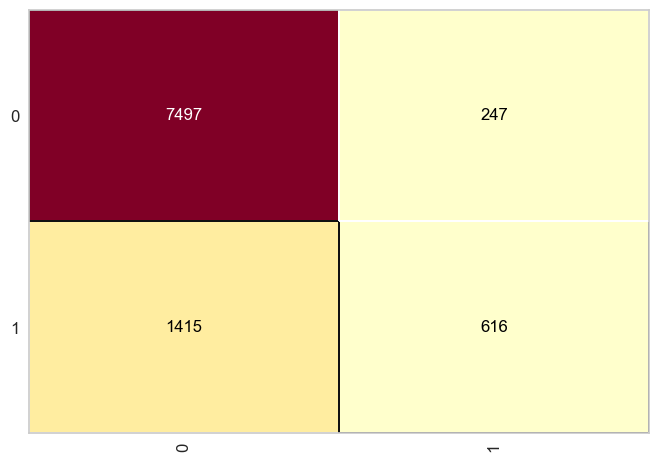

In [11]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_training, y_credit_training)
cm.score(X_credit_test, y_credit_test)